## Tutorial

In [11]:
import gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from functions import *
from joblib import load
from matplotlib.ticker import AutoMinorLocator
from IPython.display import display, clear_output

In [12]:
common_bands = np.array([
       1.0472 , 1.05375, 1.0603 , 1.06685, 1.07341, 1.07996, 1.08651,
       1.09307, 1.09962, 1.10617, 1.11273, 1.11928, 1.12584, 1.13239,
       1.13895, 1.14551, 1.15206, 1.15862, 1.16518, 1.17173, 1.17829,
       1.18485, 1.19141, 1.19797, 1.20453, 1.21109, 1.21765, 1.22421,
       1.23077, 1.23733, 1.24389, 1.25045, 1.25701, 1.26357, 1.27014,
       1.2767 , 1.28326, 1.28983, 1.29639, 1.30295, 1.30952, 1.31608,
       1.32265, 1.32921, 1.33578, 1.34234, 1.34891, 1.35548, 1.36205,
       1.36861, 1.37518, 1.38175, 1.38832, 1.39489, 1.40145, 1.40802,
       1.41459, 1.42116, 1.42773, 1.43431, 1.44088, 1.44745, 1.45402,
       1.46059, 1.46716, 1.47374, 1.48031, 1.48688, 1.49346, 1.50003,
       1.50661, 1.51318, 1.51976, 1.52633, 1.53291, 1.53948, 1.54606,
       1.55264, 1.55921, 1.56579, 1.57237, 1.57895, 1.58552, 1.5921 ,
       1.59868, 1.60526, 1.61184, 1.61842, 1.625  , 1.63158, 1.63816,
       1.64474, 1.67107, 1.67766, 1.68424, 1.69082, 1.69741, 1.70399,
       1.71058, 1.71716, 1.72375, 1.73033, 1.73692, 1.74351, 1.75009,
       1.75668, 1.76327, 1.76985, 1.77644, 1.78303, 1.78962, 1.79621,
       1.8028 , 1.80939, 1.81598, 1.82257, 1.82916, 1.83575, 1.84234,
       1.84893, 1.85552, 1.86212, 1.86871, 1.8753 , 1.8819 , 1.88849,
       1.89508, 1.90168, 1.90827, 1.91487, 1.92146, 1.92806, 1.93465,
       1.94125, 1.94785, 1.95444, 1.96104, 1.96764, 1.97424, 1.98084,
       1.98743, 1.99403, 2.00063, 2.00723, 2.01383, 2.02043, 2.02703,
       2.03363, 2.04024, 2.04684, 2.05344, 2.06004, 2.06664, 2.07325,
       2.07985, 2.08645, 2.09306, 2.09966, 2.10627, 2.11287, 2.11948,
       2.12608, 2.13269, 2.1393 , 2.1459 , 2.15251, 2.15912, 2.16572,
       2.17233, 2.17894, 2.18555, 2.19216, 2.19877, 2.20538, 2.21199,
       2.2186 , 2.22521, 2.23182, 2.23843, 2.24504, 2.25165, 2.25827,
       2.26488, 2.27149, 2.2781 , 2.28472, 2.29133, 2.29795, 2.30456,
       2.31118, 2.31779, 2.32441, 2.33102, 2.33764, 2.34426, 2.35087,
       2.35749, 2.36411, 2.37072, 2.37734, 2.38396, 2.39058, 2.3972 ,
       2.40382, 2.41044, 2.41706, 2.42368, 2.4303 , 2.43692, 2.44354,
       2.45017, 2.45679, 2.46341, 2.47003, 2.47666, 2.48328, 2.4899 ,
       2.49653, 2.50312, 2.50972, 2.51632, 2.52292, 2.52951, 2.53611,
       2.54271, 2.54931, 2.55591, 2.56251, 2.56911, 2.57571, 2.58231,
       2.58891, 2.59551, 2.60212, 2.60872, 2.61532, 2.62192, 2.62853,
       2.63513, 2.64174, 2.64834])

TRDR_bands = np.array([
        1.001350, 1.007900, 1.014450, 1.021000, 1.027550, 1.034100, 1.040650,
        1.047200, 1.053750, 1.060300, 1.066850, 1.073410, 1.079960, 1.086510,
        1.093070, 1.099620, 1.106170, 1.112730, 1.119280, 1.125840, 1.132390,
        1.138950, 1.145510, 1.152060, 1.158620, 1.165180, 1.171730, 1.178290,
        1.184850, 1.191410, 1.197970, 1.204530, 1.211090, 1.217650, 1.224210,
        1.230770, 1.237330, 1.243890, 1.250450, 1.257010, 1.263570, 1.270140,
        1.276700, 1.283260, 1.289830, 1.296390, 1.302950, 1.309520, 1.316080,
        1.322650, 1.329210, 1.335780, 1.342340, 1.348910, 1.355480, 1.362050,
        1.368610, 1.375180, 1.381750, 1.388320, 1.394890, 1.401450, 1.408020,
        1.414590, 1.421160, 1.427730, 1.434310, 1.440880, 1.447450, 1.454020,
        1.460590, 1.467160, 1.473740, 1.480310, 1.486880, 1.493460, 1.500030,
        1.506610, 1.513180, 1.519760, 1.526330, 1.532910, 1.539480, 1.546060,
        1.552640, 1.559210, 1.565790, 1.572370, 1.578950, 1.585520, 1.592100,
        1.598680, 1.605260, 1.611840, 1.618420, 1.625000, 1.631580, 1.638160,
        1.644740, 1.651330, 1.657910, 1.664490, 1.671070, 1.677660, 1.684240,
        1.690820, 1.697410, 1.703990, 1.710580, 1.717160, 1.723750, 1.730330,
        1.736920, 1.743510, 1.750090, 1.756680, 1.763270, 1.769850, 1.776440,
        1.783030, 1.789620, 1.796210, 1.802800, 1.809390, 1.815980, 1.822570,
        1.829160, 1.835750, 1.842340, 1.848930, 1.855520, 1.862120, 1.868710,
        1.875300, 1.881900, 1.888490, 1.895080, 1.901680, 1.908270, 1.914870,
        1.921460, 1.928060, 1.934650, 1.941250, 1.947850, 1.954440, 1.961040,
        1.967640, 1.974240, 1.980840, 1.987430, 1.994030, 2.000630, 2.007230,
        2.013830, 2.020430, 2.027030, 2.033630, 2.040240, 2.046840, 2.053440,
        2.060040, 2.066640, 2.073250, 2.079850, 2.086450, 2.093060, 2.099660,
        2.106270, 2.112870, 2.119480, 2.126080, 2.132690, 2.139300, 2.145900,
        2.152510, 2.159120, 2.165720, 2.172330, 2.178940, 2.185550, 2.192160,
        2.198770, 2.205380, 2.211990, 2.218600, 2.225210, 2.231820, 2.238430,
        2.245040, 2.251650, 2.258270, 2.264880, 2.271490, 2.278100, 2.284720,
        2.291330, 2.297950, 2.304560, 2.311180, 2.317790, 2.324410, 2.331020,
        2.337640, 2.344260, 2.350870, 2.357490, 2.364110, 2.370720, 2.377340,
        2.383960, 2.390580, 2.397200, 2.403820, 2.410440, 2.417060, 2.423680,
        2.430300, 2.436920, 2.443540, 2.450170, 2.456790, 2.463410, 2.470030,
        2.476660, 2.483280, 2.489900, 2.496530, 2.503120, 2.509720, 2.516320,
        2.522920, 2.529510, 2.536110, 2.542710, 2.549310, 2.555910, 2.562510,
        2.569110, 2.575710, 2.582310, 2.588910, 2.595510, 2.602120, 2.608720,
        2.615320, 2.621920, 2.628530, 2.635130, 2.641740, 2.648340, 2.654950,
        2.661550, 2.668160, 2.674760, 2.681370, 2.687980, 2.694580, 2.701190,
        2.760680, 2.767290, 2.773900, 2.780520, 2.787130, 2.793740, 2.800350,
        2.806970, 2.813580, 2.820200, 2.826810, 2.833430, 2.840040, 2.846660,
        2.853280, 2.859890, 2.866510, 2.873130, 2.879750, 2.886360, 2.892980,
        2.899600, 2.906220, 2.912840, 2.919460, 2.926080, 2.932700, 2.939320,
        2.945950, 2.952570, 2.959190, 2.965810, 2.972440, 2.979060, 2.985680,
        2.992310, 2.998930, 3.005560, 3.012180, 3.018810, 3.025440, 3.032060,
        3.038690, 3.045320, 3.051950, 3.058570, 3.065200, 3.071830, 3.078460,
        3.085090, 3.091720, 3.098350, 3.104980, 3.111610, 3.118250, 3.124880,
        3.131510, 3.138140, 3.144780, 3.151410, 3.158040, 3.164680, 3.171310,
        3.177950, 3.184580, 3.191220, 3.197850, 3.204490, 3.211130, 3.217760,
        3.224400, 3.231040, 3.237680, 3.244320, 3.250960, 3.257600, 3.264240,
        3.270880, 3.277520, 3.284160, 3.290800, 3.297440, 3.304080, 3.310730,
        3.317370, 3.324010, 3.330660, 3.337300, 3.343950, 3.350590, 3.357240,
        3.363880, 3.370530, 3.377170, 3.383820, 3.390470, 3.397120, 3.403760,
        3.410410, 3.417060, 3.423710, 3.430360, 3.437010, 3.443660, 3.450310,
        3.456960, 3.463610, 3.470260, 3.476920, 3.483570, 3.490220, 3.496870,
        3.503530, 3.510180, 3.516840, 3.523490, 3.530150, 3.536800, 3.543460,
        3.550110, 3.556770, 3.563430, 3.570080, 3.576740, 3.583400, 3.590060,
        3.596720, 3.603380, 3.610040, 3.616700, 3.623360, 3.630020, 3.636680,
        3.643340, 3.650000, 3.656670, 3.663330, 3.669990, 3.676650, 3.683320,
        3.689980, 3.696650, 3.703310, 3.709980, 3.716640, 3.723310, 3.729980,
        3.736640, 3.743310, 3.749980, 3.756650, 3.763310, 3.769980, 3.776650,
        3.783320, 3.789990, 3.796660, 3.803330, 3.810000, 3.816670, 3.823350,
        3.830020, 3.836690, 3.843360, 3.850040, 3.856710, 3.863390, 3.870060,
        3.876730, 3.883410, 3.890080, 3.896760, 3.903440, 3.910110, 3.916790,
        3.923470, 3.930150, 3.936820, 4.000000])

reference_bands = np.array([
        0.43613, 0.44263, 0.44914, 0.45564, 0.46215, 0.46865, 0.47516,
        0.48167, 0.48817, 0.49468, 0.50119, 0.5077 , 0.51421, 0.52072,
        0.52723, 0.53374, 0.54025, 0.54676, 0.55327, 0.55978, 0.56629,
        0.57281, 0.57932, 0.58583, 0.59235, 0.59886, 0.60538, 0.61189,
        0.61841, 0.62492, 0.63144, 0.70968, 0.7162 , 0.72272, 0.72925,
        0.73577, 0.7423 , 0.74882, 0.75535, 0.76187, 0.7684 , 0.77492,
        0.78145, 0.78798, 0.79451, 0.80104, 0.80756, 0.81409, 0.82062,
        0.82715, 0.83368, 0.84022, 0.84675, 0.85328, 0.85981, 0.86634,
        0.87288, 0.87941, 0.88595, 0.89248, 0.89902, 0.90555, 0.91209,
        0.91862, 0.92516, 0.9317 , 0.93824, 0.94477, 0.95131, 0.95785,
        0.96439, 0.97093, 0.97747, 0.98401, 0.99055, 0.9971 , 1.00364,
        1.01018, 1.0472 , 1.05375, 1.0603 , 1.06685, 1.07341, 1.07996,
        1.08651, 1.09307, 1.09962, 1.10617, 1.11273, 1.11928, 1.12584,
        1.13239, 1.13895, 1.14551, 1.15206, 1.15862, 1.16518, 1.17173,
        1.17829, 1.18485, 1.19141, 1.19797, 1.20453, 1.21109, 1.21765,
        1.22421, 1.23077, 1.23733, 1.24389, 1.25045, 1.25701, 1.26357,
        1.27014, 1.2767 , 1.28326, 1.28983, 1.29639, 1.30295, 1.30952,
        1.31608, 1.32265, 1.32921, 1.33578, 1.34234, 1.34891, 1.35548,
        1.36205, 1.36861, 1.37518, 1.38175, 1.38832, 1.39489, 1.40145,
        1.40802, 1.41459, 1.42116, 1.42773, 1.43431, 1.44088, 1.44745,
        1.45402, 1.46059, 1.46716, 1.47374, 1.48031, 1.48688, 1.49346,
        1.50003, 1.50661, 1.51318, 1.51976, 1.52633, 1.53291, 1.53948,
        1.54606, 1.55264, 1.55921, 1.56579, 1.57237, 1.57895, 1.58552,
        1.5921 , 1.59868, 1.60526, 1.61184, 1.61842, 1.625  , 1.63158,
        1.63816, 1.64474, 1.67107, 1.67766, 1.68424, 1.69082, 1.69741,
        1.70399, 1.71058, 1.71716, 1.72375, 1.73033, 1.73692, 1.74351,
        1.75009, 1.75668, 1.76327, 1.76985, 1.77644, 1.78303, 1.78962,
        1.79621, 1.8028 , 1.80939, 1.81598, 1.82257, 1.82916, 1.83575,
        1.84234, 1.84893, 1.85552, 1.86212, 1.86871, 1.8753 , 1.8819 ,
        1.88849, 1.89508, 1.90168, 1.90827, 1.91487, 1.92146, 1.92806,
        1.93465, 1.94125, 1.94785, 1.95444, 1.96104, 1.96764, 1.97424,
        1.98084, 1.98743, 1.99403, 2.00063, 2.00723, 2.01383, 2.02043,
        2.02703, 2.03363, 2.04024, 2.04684, 2.05344, 2.06004, 2.06664,
        2.07325, 2.07985, 2.08645, 2.09306, 2.09966, 2.10627, 2.11287,
        2.11948, 2.12608, 2.13269, 2.1393 , 2.1459 , 2.15251, 2.15912,
        2.16572, 2.17233, 2.17894, 2.18555, 2.19216, 2.19877, 2.20538,
        2.21199, 2.2186 , 2.22521, 2.23182, 2.23843, 2.24504, 2.25165,
        2.25827, 2.26488, 2.27149, 2.2781 , 2.28472, 2.29133, 2.29795,
        2.30456, 2.31118, 2.31779, 2.32441, 2.33102, 2.33764, 2.34426,
        2.35087, 2.35749, 2.36411, 2.37072, 2.37734, 2.38396, 2.39058,
        2.3972 , 2.40382, 2.41044, 2.41706, 2.42368, 2.4303 , 2.43692,
        2.44354, 2.45017, 2.45679, 2.46341, 2.47003, 2.47666, 2.48328,
        2.4899 , 2.49653, 2.50312, 2.50972, 2.51632, 2.52292, 2.52951,
        2.53611, 2.54271, 2.54931, 2.55591, 2.56251, 2.56911, 2.57571,
        2.58231, 2.58891, 2.59551, 2.60212, 2.60872, 2.61532, 2.62192,
        2.62853, 2.63513, 2.64174, 2.64834, 2.65495, 2.84004, 2.84666,
        2.85328, 2.85989, 2.86651, 2.87313, 2.87975, 2.88636, 2.89298,
        2.8996 , 2.90622, 2.91284, 2.91946, 2.92608, 2.9327 , 2.93932,
        2.94595, 2.95257, 2.95919, 2.96581, 2.97244, 2.97906, 2.98568,
        2.99231, 2.99893, 3.00556, 3.01218, 3.01881, 3.02544, 3.03206,
        3.03869, 3.04532, 3.05195, 3.05857, 3.0652 , 3.07183, 3.07846,
        3.08509, 3.09172, 3.09835, 3.10498, 3.11161, 3.11825, 3.12488,
        3.13151, 3.13814, 3.14478, 3.15141, 3.15804, 3.16468, 3.17131,
        3.17795, 3.18458, 3.19122, 3.19785, 3.20449, 3.21113, 3.21776,
        3.2244 , 3.23104, 3.23768, 3.24432, 3.25096, 3.2576 , 3.26424,
        3.27088, 3.27752, 3.28416, 3.2908 , 3.29744, 3.30408, 3.31073,
        3.31737, 3.32401, 3.33066, 3.3373 , 3.34395, 3.35059, 3.35724,
        3.36388, 3.37053, 3.37717, 3.38382, 3.39047, 3.39712, 3.40376,
        3.41041, 3.41706, 3.42371, 3.43036, 3.43701, 3.44366, 3.45031,
        3.45696, 3.46361, 3.47026, 3.47692, 3.48357, 3.49022, 3.49687,
        3.50353, 3.51018, 3.51684, 3.52349, 3.53015, 3.5368 , 3.54346,
        3.55011, 3.55677, 3.56343, 3.57008, 3.57674, 3.5834 , 3.59006,
        3.59672, 3.60338, 3.61004, 3.6167 , 3.62336, 3.63002, 3.63668,
        3.64334, 3.65   , 3.65667, 3.66333, 3.66999, 3.67665, 3.68332,
        3.68998, 3.69665, 3.70331, 3.70998, 3.71664, 3.72331, 3.72998,
        3.73664, 3.74331, 3.74998, 3.75665, 3.76331, 3.76998, 3.77665,
        3.78332, 3.78999, 3.79666, 3.80333, 3.81   , 3.81667, 3.82335,
        3.83002, 3.83669, 3.84336, 3.85004, 3.85671, 3.86339, 3.87006,
        3.87673, 3.88341, 3.89008, 3.89676])

In [17]:
# For comparison, focus only on the common bands
TRDR_bands_indices = np.where(np.isin(TRDR_bands, common_bands))[0]
reference_bands_indices = np.where(np.isin(reference_bands, common_bands))[0]

The input images must be TRDR images that have undergone atmospheric and photometric corrections. These data can be obtained from [MarSI](https://marssi.univ-lyon1.fr/MarsSI/). I've provided four example images here. Running the following code will download the 'image_hdrs' folder, which contains the image data and reference data sourced from the [MRO CRISM Type Spectra Library](https://crismtypespectra.rsl.wustl.edu).

In [2]:
url = 'https://drive.google.com/drive/folders/1xpm0tjVrZJYqxnDNO_kwEMyH9kfgaMMY?usp=share_link'
gdown.download_folder(url, quiet=False, use_cookies=False)
clear_output()
display("Downloads completed.")

'Downloads completed.'

In [3]:
# load pre-trained model and scaler
model = load('models/logistic_regression_model.joblib')
scaler = load('models/min_max_scaler.joblib')

In [4]:
# Jarosite
pix_coor = [201, 428]
hdr_path = 'image_hdrs/FRT0000AA7D_07_IF166L_TRR3_CAT_corr.hdr'
tab_path = 'image_hdrs/crism_typespec_jarosite.tab'

In [5]:
# # Kaolinite
# pix_coor = [286, 41]
# hdr_path = 'image_hdrs/HRL000040FF_07_IF183L_TRR3_CAT_corr.hdr'
# tab_path = 'image_hdrs/crism_typespec_kaolinite.tab'

In [6]:
# # Alunite
# pix_coor = [451, 380]
# hdr_path = 'image_hdrs/FRT00009E4C_07_IF164L_TRR3_CAT_corr.hdr'
# tab_path = 'image_hdrs/crism_typespec_alunite.tab'

In [7]:
# # Fe-smectite
# pix_coor = [98, 93]
# hdr_path = 'image_hdrs/FRT0000A425_07_IF166L_TRR3_CAT_corr.hdr'
# tab_path = 'image_hdrs/crism_typespec_fe_smectite.tab'

In [8]:
# load reference spectrum
data = pd.read_csv(tab_path, header=None, index_col=False)
reference = np.array(data.iloc[:, 1])

In [14]:
# pixel ratioing
unratioed, ratioed_bland, ratioed_median = \
get_spectrum(hdr_path, pix_coor, model, scaler, ROI = None, window_size = 50, num_bland = 3)

In [15]:
# spectra in common bands
reference = reference[reference_bands_indices]
unratioed = unratioed[TRDR_bands_indices]
ratioed_bland = ratioed_bland[TRDR_bands_indices]
ratioed_median = ratioed_median[TRDR_bands_indices]

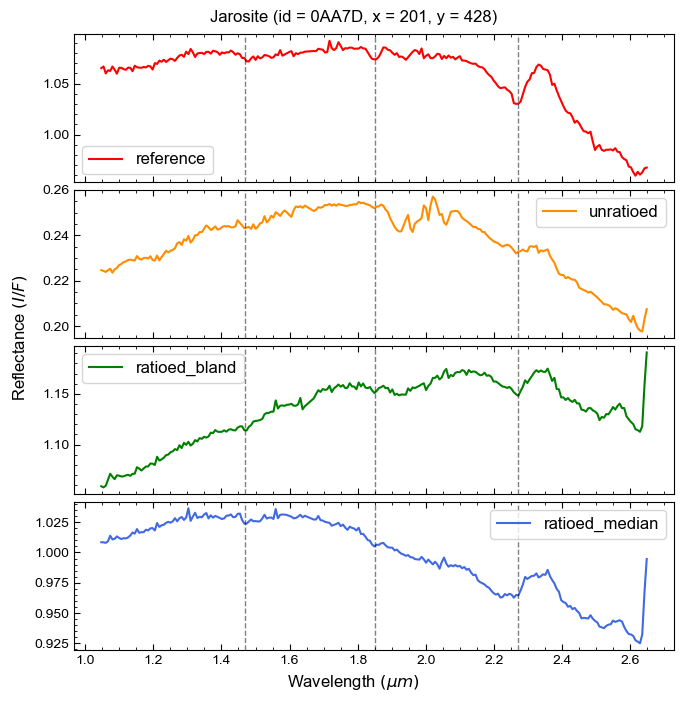

In [16]:
plt.rcParams["font.family"] = "Arial"

fig, axs = plt.subplots(4, 1, figsize=(8, 8), sharex=True)

axs[0].plot(common_bands, reference, color='red', label='reference')

axs[1].plot(common_bands, unratioed, color='darkorange', label='unratioed')

axs[2].plot(common_bands, ratioed_bland, color='green', label='ratioed_bland')

axs[3].plot(common_bands, ratioed_median, color='royalblue', label='ratioed_median')

fig.text(0.07, 0.5, r'Reflectance $(I/F)$', va='center', rotation='vertical', fontsize=12)
fig.text(0.5, 0.07, r'Wavelength $(\mu m)$', ha='center', va='center', fontsize=12)

for ax in axs:
    ax.legend(loc='best', fontsize=12)
    
    # Show ticks on top and left sides
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')

    # Adjusting the tick lengths
    ax.tick_params(axis='both', which='major', length=4, direction='in', top=True, right=False)
    ax.tick_params(axis='both', which='minor', length=2, direction='in', top=True, right=False)
    
    # Adding minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())

# Add vertical lines to mark spectral features

mineral = 'Jarosite'
drop_lines = [1.47, 1.85, 2.27]
plt.suptitle(mineral + ' (id = 0AA7D, x = 201, y = 428)', fontsize=12, y=0.91)

# mineral = 'Kaolinite'
# drop_lines = [1.41, 1.92, 2.21]
# plt.suptitle(mineral + ' (id = 040FF, x = 286, y = 41)', fontsize=12, y=0.91)

# mineral = 'Alunite'
# drop_lines = [1.48, 1.77, 1.94, 2.16]
# plt.suptitle(mineral + ' (id = 09E4C, x = 451, y = 380)', fontsize=12, y=0.91)

# mineral = 'Fe-smectite'
# drop_lines = [1.42, 1.91, 2.29, 2.39, 2.52]
# plt.suptitle(mineral + ' (id = 0A425, x = 98, y = 93)', fontsize=12, y=0.91)

for x in drop_lines:
    for ax in axs:
        ax.axvline(x, color='black', linestyle='--', alpha=0.5, linewidth=1)

plt.subplots_adjust(left=0.15, hspace=0.05)

# plt.savefig('compare/'+mineral+'.png', dpi=300)

plt.show()